In [77]:
#importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

GeoPandas User Guide: https://geopandas.org/en/stable/docs/user_guide.html

Here, we are adding a new type of data to the project - A shapefile on which we plot the noise data.
    -  So, what is a shape file:
    A shapefile is a simple, nontopological format for storing the geometric location and attribute information of 
    geographic features. Geographic features in a shapefile can be represented by points, lines, or polygons (areas).
    The workspace containing shapefiles may also contain dBASE tables, which can store additional attributes that can 
    be joined to a shapefile's features.

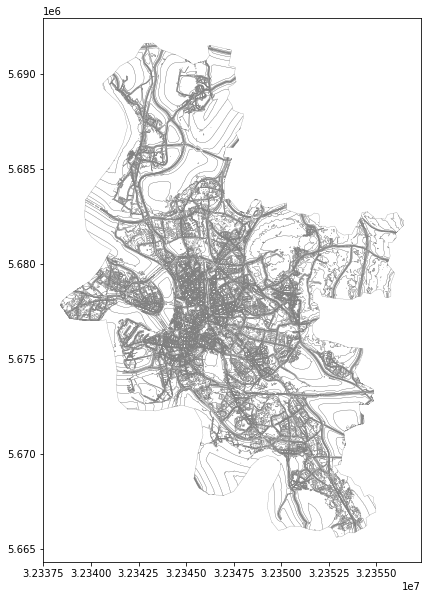

In [78]:
#loading the dataset & plotting the map
duss = gpd.read_file('StrLK_2018_tagsüber.zip')
ax = duss.plot(figsize=(10,10), color='None', edgecolor='grey', linewidth=0.25)
fig.savefig('gpd_st1.jpg', bbox_inches='tight', dpi=150)

In [79]:
type(duss),duss.crs

(geopandas.geodataframe.GeoDataFrame,
 <Derived Projected CRS: ESRI:102329>
 Name: ETRS_1989_UTM_Zone_32N_8stellen
 Axis Info [cartesian]:
 - [east]: Easting (metre)
 - [north]: Northing (metre)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: unnamed
 - method: Transverse Mercator
 Datum: European Terrestrial Reference System 1989
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

What is Coordinate Reference System(crs)?:
    https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/

In [80]:
#changing the crs to standard form
duss = duss.to_crs(4326)

In [81]:
duss.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

epsg:4326


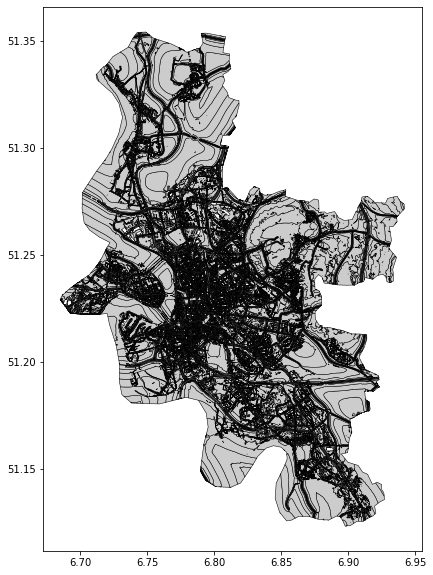

In [82]:
#variation
#dus = gpd.read_file('StrLK_2018_tagsüber.zip')
ax = dus.plot(figsize=(10,10), color='#CCCCCC', edgecolor='black', linewidth=0.5)
fig.savefig('gpd_st2.jpg', bbox_inches='tight', dpi=150)
print(dus.crs)

In [83]:
dus = dus.to_crs(4326)
dus.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [84]:
#loading the noise dataset
dataset = pd.read_csv('noise_c.csv')

In [85]:
df = dataset#.sample(39500)

In [86]:
#converting the noise dataframe to a GeoDataframe with GeoPandas
noise=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude,df.Latitude,crs="EPSG:4326"))
noise.head()

,Address,DB_TAG,DB_NACHT,Latitude,Longitude,geometry
0,"Aachener Straße 1, Düsseldorf, Germany",68,62,51.207592,6.776500,POINT (6.77650 51.20759)
1,"Aachener Straße 10, Düsseldorf, Germany",68,61,51.207128,6.776436,POINT (6.77644 51.20713)
2,"Aachener Straße 101, Düsseldorf, Germany",70,63,51.202533,6.771146,POINT (6.77115 51.20253)
3,"Aachener Straße 103, Düsseldorf, Germany",70,62,51.202428,6.771077,POINT (6.77108 51.20243)
4,"Aachener Straße 105, Düsseldorf, Germany",69,62,51.202332,6.771107,POINT (6.77111 51.20233)


In [87]:
maxx = noise.loc[noise['DB_TAG'].idxmax()]
minn = noise.loc[noise['DB_TAG'].idxmin()]
print(maxx)
print(minn)

Address      Heerdter Sandberg 12, Düsseldorf, Germany
DB_TAG                                              78
DB_NACHT                                            72
Latitude                                     51.236276
Longitude                                     6.735052
geometry               POINT (6.735051795 51.23627605)
Name: 32293, dtype: object
Address      Kölner Weg 201, Düsseldorf, Germany
DB_TAG                                        34
DB_NACHT                                      27
Latitude                               51.147832
Longitude                               6.815906
geometry          POINT (6.815906462 51.1478324)
Name: 44407, dtype: object


Different Visualisation of Düsseldorf Noise Data Points

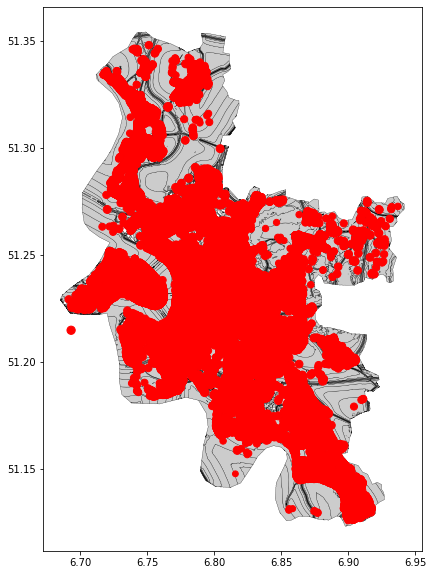

In [88]:
#day
dus_plot = dus.plot(color='#CCCCCC', edgecolor='black', linewidth=0.25, figsize=(15, 10))
noise.plot(ax=dus_plot, markersize=noise['DB_TAG'], color="red", marker="o")
plt.show()
fig.savefig('gpd_st_day1.jpg', bbox_inches='tight', dpi=150)

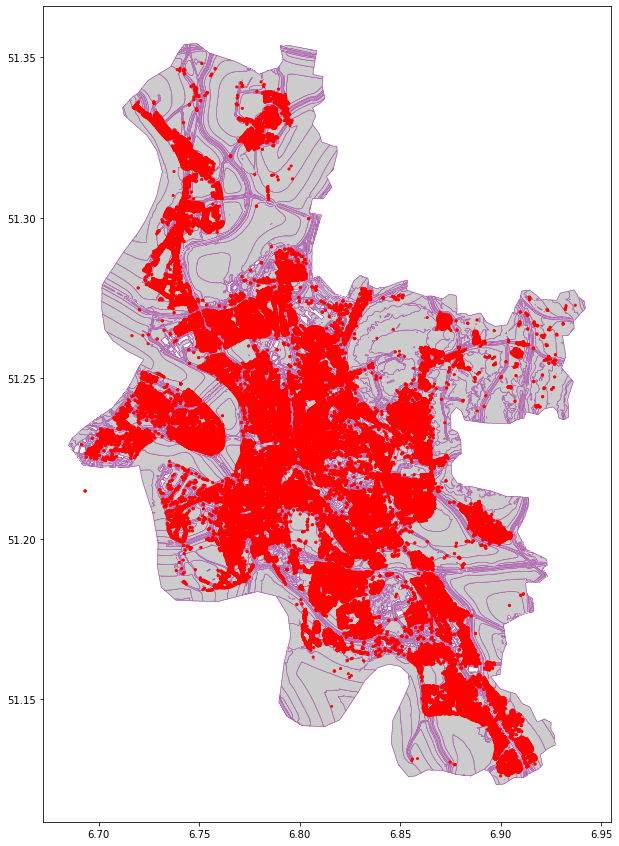

In [89]:
#day
fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='#CCCCCC', edgecolor='purple', linewidth=0.5, zorder=1)
duss.plot(ax=ax, color='None', edgecolor='white', linewidth=0.25, zorder=2, alpha=0.5)
noise.plot(ax=ax, markersize=noise['DB_TAG']/10, color="red", zorder=3)
plt.show()
fig.savefig('gpd_st_day2.jpg', bbox_inches='tight', dpi=150)

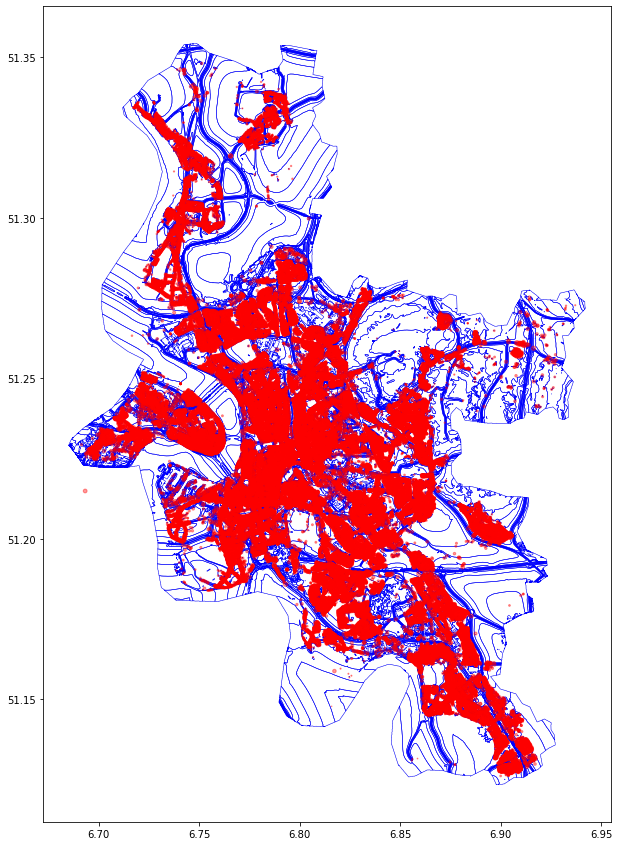

In [90]:
#day filter
fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='blue', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25, zorder=1, alpha=0.3)
noise.plot(ax=ax, markersize=(noise['DB_TAG'])**5/(10**8), color="red", marker="o", zorder=3, alpha=0.4)
plt.show()
fig.savefig('gpd_st_day_filt1.jpg', bbox_inches='tight', dpi=150)

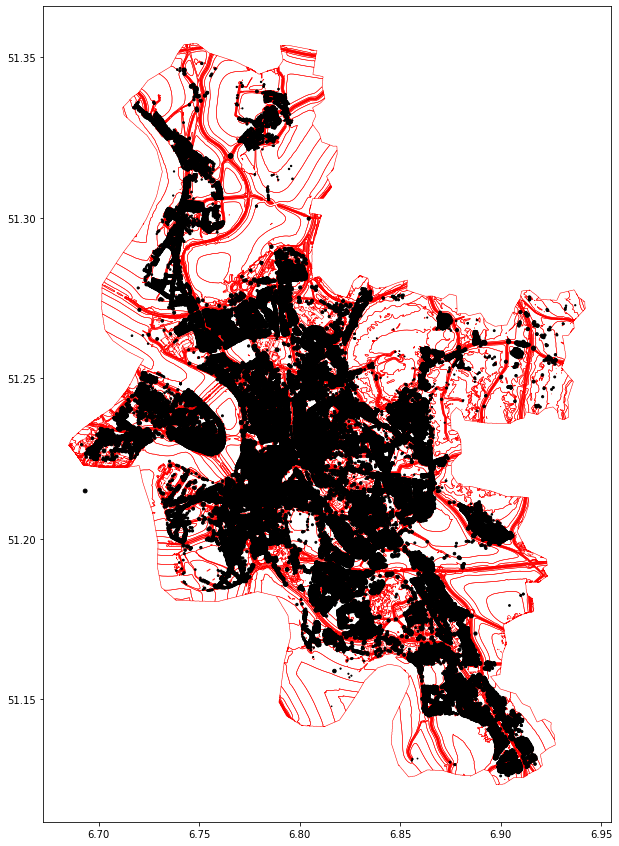

In [91]:
#day filter
color = [(str(1/(item)**2))for item in noise['DB_TAG']]
fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='red', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='orange', linewidth=0.125, zorder=1, alpha=0.2)
noise.plot(ax=ax, markersize=(noise['DB_TAG'])**5/(10**8), c=color, zorder=3)
plt.show()
fig.savefig('gpd_st_day_filt2.jpg', bbox_inches='tight', dpi=150)

#### mpl colormap

https://matplotlib.org/stable/tutorials/colors/colormaps.html

https://bids.github.io/colormap/

https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/

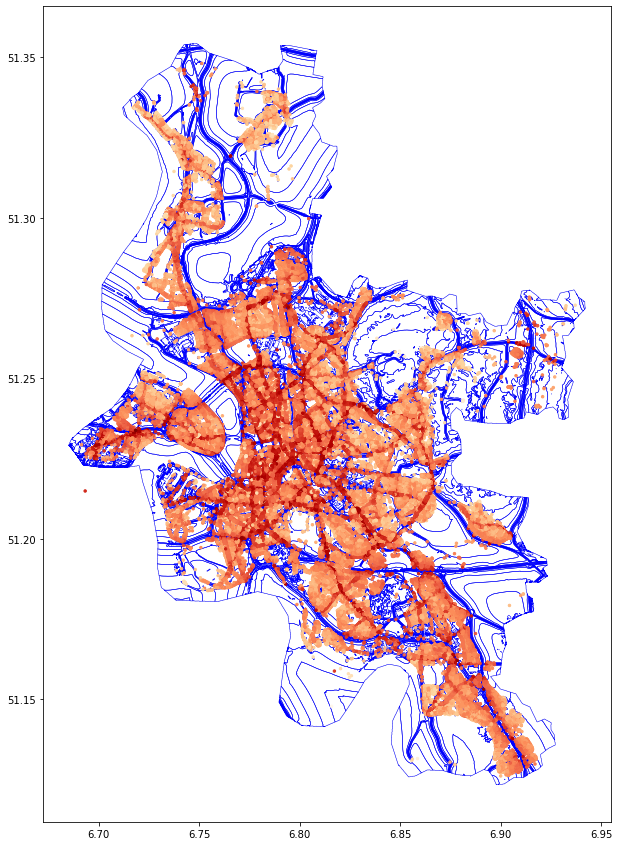

In [92]:
#day color var
fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='blue', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25, zorder=1, alpha=0.3)
noise.plot(ax=ax, markersize=6, column='DB_TAG', cmap='OrRd', zorder=3)
plt.show()
fig.savefig('gpd_st_day_color_var1', bbox_inches='tight', dpi=150)

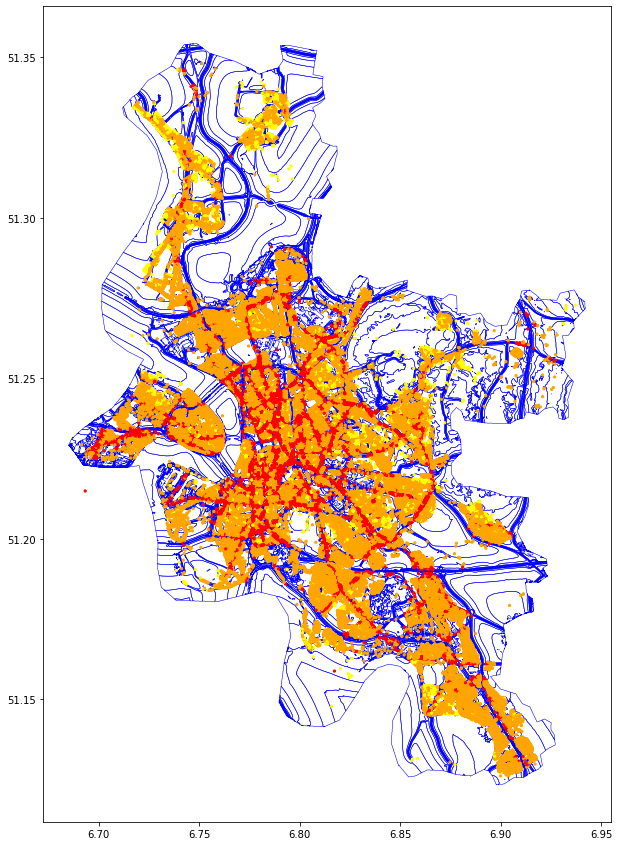

In [93]:
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l in range(30,50):
            cols.append('yellow')
        elif l in range(50,65):
            cols.append('orange')
        else:
            cols.append('red')
    return cols
# Create the colors list using the function above
cols=pltcolor(noise['DB_TAG'])

fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='blue', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25, zorder=1, alpha=0.2)
noise.plot(ax=ax, markersize=5, c=cols, zorder=3)
plt.show()
fig.savefig('gpd_st_day_color_var2', bbox_inches='tight', dpi=150)

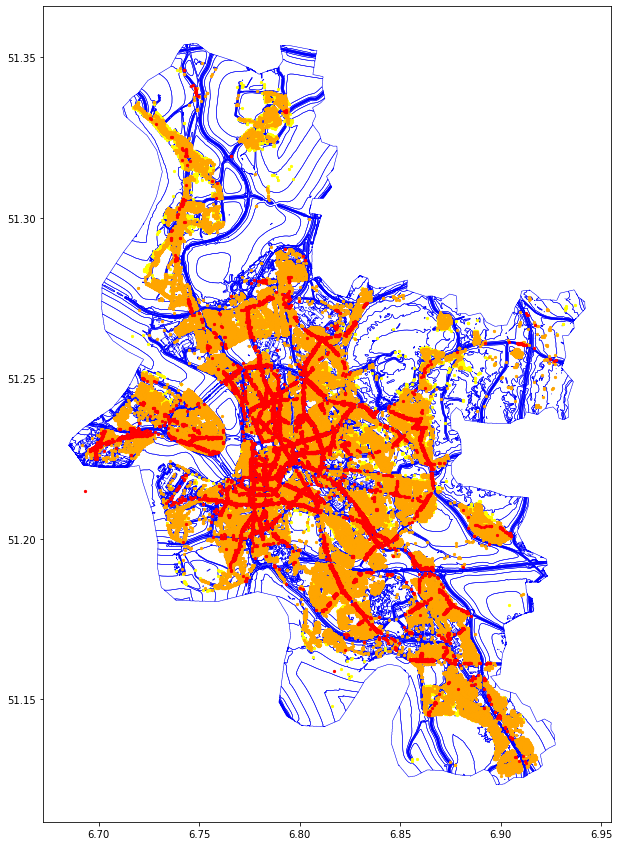

In [94]:
#day color var
df2 = noise.loc[(noise['DB_TAG'] <= 50)]
df3 = noise.loc[(noise['DB_TAG'] > 50 )&(noise['DB_TAG'] <= 65)]
df4 = noise.loc[(noise['DB_TAG'] > 65)]

fig, ax = plt.subplots(figsize=(15, 15))
dus.plot(ax=ax, color='None', edgecolor='blue', linewidth=0.5, zorder=2)
duss.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25, zorder=1, alpha=0.3)
df2.plot(ax=ax, markersize=5, color='yellow', zorder=3)
df3.plot(ax=ax, markersize=5, color='orange', zorder=4)
df4.plot(ax=ax, markersize=5, color='red', zorder=5)
plt.show()
fig.savefig('gpd_st_day_color_var3', bbox_inches='tight', dpi=150)